In [43]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit_predict(self, X, initial_centroids=None):
        # Initialization
        if initial_centroids is not None:
            self.centroids = np.array(initial_centroids)
        else:
            random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            self.centroids = X[random_indices]

        for iteration in range(self.max_iter):
            #Assignment
            cluster_group = self.assign_clusters(X)
            # Update
            new_centroids = self.move_centroids(X, cluster_group)
            # Convergence check
            if np.max(np.abs(self.centroids - new_centroids)) < self.tol:
                break

            self.centroids = new_centroids

        return cluster_group

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[cluster_group == i]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                new_centroids.append(self.centroids[i])  
        return np.array(new_centroids)


In [44]:

X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

initial_centroids = [(3.0, 3.0), (2.0, 2.0)]

# Part (a): Fit the model
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X, initial_centroids)

Final Centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


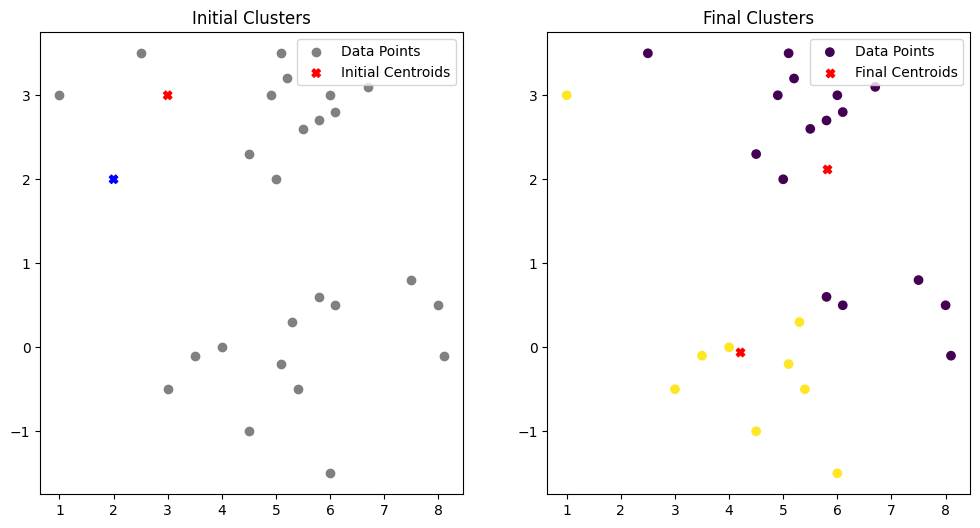

In [45]:

# Part (b): Plot initial and final clusters
print("Final Centroids:", kmeans.centroids)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data Points')
plt.scatter(*zip(*initial_centroids), c=['red', 'blue'], label='Initial Centroids', marker='X')
plt.title("Initial Clusters")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Data Points')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', label='Final Centroids')
plt.title("Final Clusters")
plt.legend()

plt.show()

    

In [46]:
# Part (c): Compare with random initialization
random_kmeans = KMeans(n_clusters=2)
random_clusters = random_kmeans.fit_predict(X)

print("Random Initialization Final Centroids:", random_kmeans.centroids)


Random Initialization Final Centroids: [[ 4.85833333  2.89166667]
 [ 5.56153846 -0.09230769]]


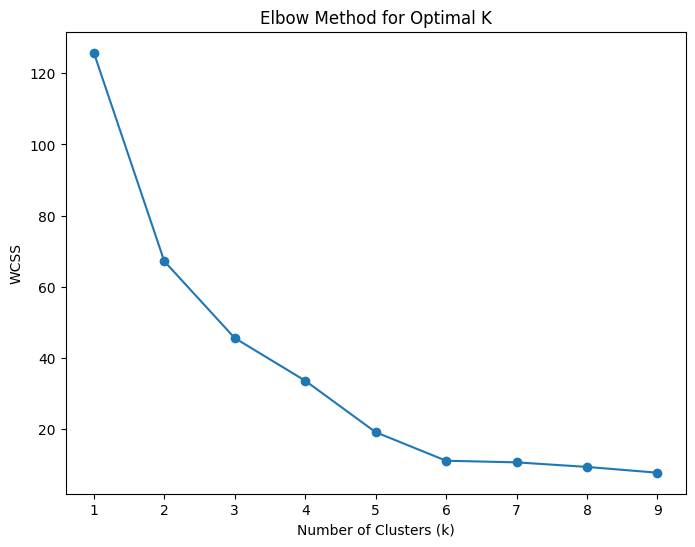

In [47]:
# Part (d): Elbow Method
wcss = []
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    wcss.append(sum(np.min(np.linalg.norm(X[:, np.newaxis] - model.centroids, axis=2), axis=1)**2))

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

Centroids: [[ 1.75        3.25      ]
 [ 6.15        2.9       ]
 [ 3.75       -0.4       ]
 [ 5.03333333  2.76666667]
 [ 6.36666667  0.04444444]]


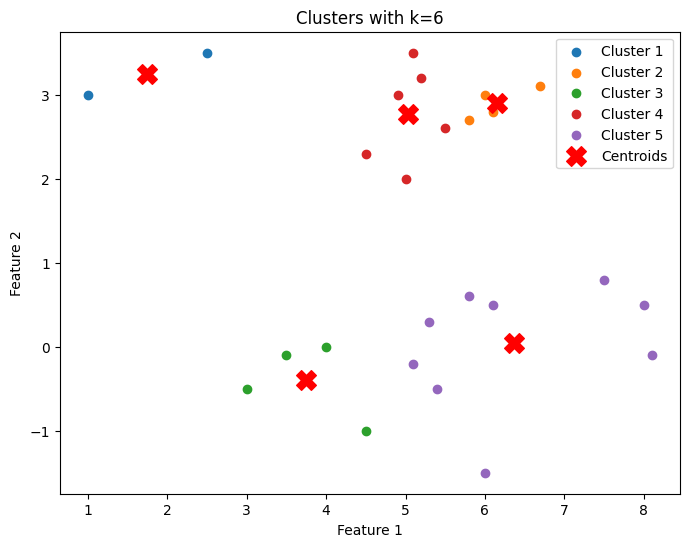

In [ ]:

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X)
print("Centroids:", kmeans.centroids)
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Clusters with k=6')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
